# Installation

In [ ]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!pip install ipympl

In [ ]:
0:179, 180

In [ ]:
1,2,3,4,5,6

# Imports

In [15]:
import tensorflow as tf
import cv2
# from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import keras
import pandas as pd
from pprint import pprint
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib


# Data

## Initializing Environment in Kaggle

In [ ]:
dataset_dir = '/kaggle/working'

In [6]:
!cp -r /kaggle/input/cloud-images-19510/ /kaggle/working/

In [41]:
!cp -r /kaggle/input/cloud-images-19510/ /kaggle/working/

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [1]:
import os
import json

from kaggle_secrets import UserSecretsClient
secrets = UserSecretsClient()

os.environ['KAGGLE_USERNAME'] = secrets.get_secret("KAGGLE_USERNAME")
os.environ['KAGGLE_KEY'] = secrets.get_secret("KAGGLE_KEY")

!cp -r /kaggle/input/cloud-images-19510/ /kaggle/working/

meta = dict(
    id="ishansrivastava1308/Cloud-Images-19510",
    title="Cloud images Dataset",
    isPrivate=False,
    licenses=[dict(name="other")]
)

with open(os.path.join('/kaggle/working/cloud-images-19510','dataset-metadata.json'), 'w') as f:
    json.dump(meta, f)
    

!kaggle datasets version -m "Version 7 Classified Update" -p /kaggle/working/cloud-images-19510 --dir-mode tar

Starting upload for file train_shell.csv
100%|██████████████████████████████████████| 58.0M/58.0M [00:02<00:00, 24.0MB/s]
Upload successful: train_shell.csv (58MB)
Starting upload for file Regression_model_e_10.keras
100%|██████████████████████████████████████| 52.8M/52.8M [00:02<00:00, 23.3MB/s]
Upload successful: Regression_model_e_10.keras (53MB)
Starting upload for file Regression_model_e_20.keras
100%|██████████████████████████████████████| 52.8M/52.8M [00:02<00:00, 23.6MB/s]
Upload successful: Regression_model_e_20.keras (53MB)
Starting upload for file train.csv
100%|██████████████████████████████████████| 47.1M/47.1M [00:02<00:00, 22.3MB/s]
Upload successful: train.csv (47MB)
Starting upload for file Train_Imputed.csv
100%|██████████████████████████████████████| 50.9M/50.9M [00:02<00:00, 23.1MB/s]
Upload successful: Train_Imputed.csv (51MB)
Starting upload for file train_shell_remake_imputed.csv
100%|██████████████████████████████████████| 54.2M/54.2M [00:02<00:00, 23.6MB/s]
Upl

In [2]:
!cp -r /kaggle/input/cloud-images-19510/cloud-images-19510/train.csv /kaggle/working/

In [34]:
os.path.join('/kaggle/working/cloud-images-19510','dataset-metadata.json')

'/kaggle/working/cloud-images-19510/dataset-metadata.json'

In [25]:
import os
import json

from kaggle_secrets import UserSecretsClient
secrets = UserSecretsClient()

os.environ['KAGGLE_USERNAME'] = secrets.get_secret("KAGGLE_USERNAME")
os.environ['KAGGLE_KEY'] = secrets.get_secret("KAGGLE_KEY")

In [30]:



meta = dict(
    id="ishansrivastava1308/Cloud-Images-19510",
    title="Cloud images Dataset",
    isPrivate=False,
    licenses=[dict(name="other")]
)

with open(os.path.join('/kaggle/working/cloud-images-19510','dataset-metadata.json'), 'w') as f:
    json.dump(meta, f)


In [ ]:
# !kaggle datasets init

In [ ]:
# !kaggle datasets create -p {dataset_dir} --dir-mode zip

In [ ]:
!kaggle datasets version -m "Version 4  Update" -p /kaggle/working/ --dir-mode tar -d

Starting upload for file cloud-images-19510.tar
 38%|██████████████▋                        | 886M/2.30G [00:30<00:52, 29.1MB/s]

## Creating new Dataset Version

## Initializing Environment in Google Colab

In [4]:
import os
import json

from google.colab import userdata

os.environ['KAGGLE_USERNAME'] = userdata.get("KAGGLE_USERNAME")
os.environ['KAGGLE_KEY'] = userdata.get("KAGGLE_KEY")

ModuleNotFoundError: No module named 'google.colab'

## Downloading Data in google colab

In [ ]:
!kaggle datasets download ishansrivastava1308/cloud-images-19510 -p /content/kaggle/input --force
!unzip /content/kaggle/input/cloud-images-19510.zip -d /content/kaggle/input/cloud-images-19510 && rm /content/kaggle/input/cloud-images-19510.zip


In [ ]:
# rm -r kaggle/input/

## Undistorting Images

In [ ]:
PWD = os.getcwd()
print(PWD)

/


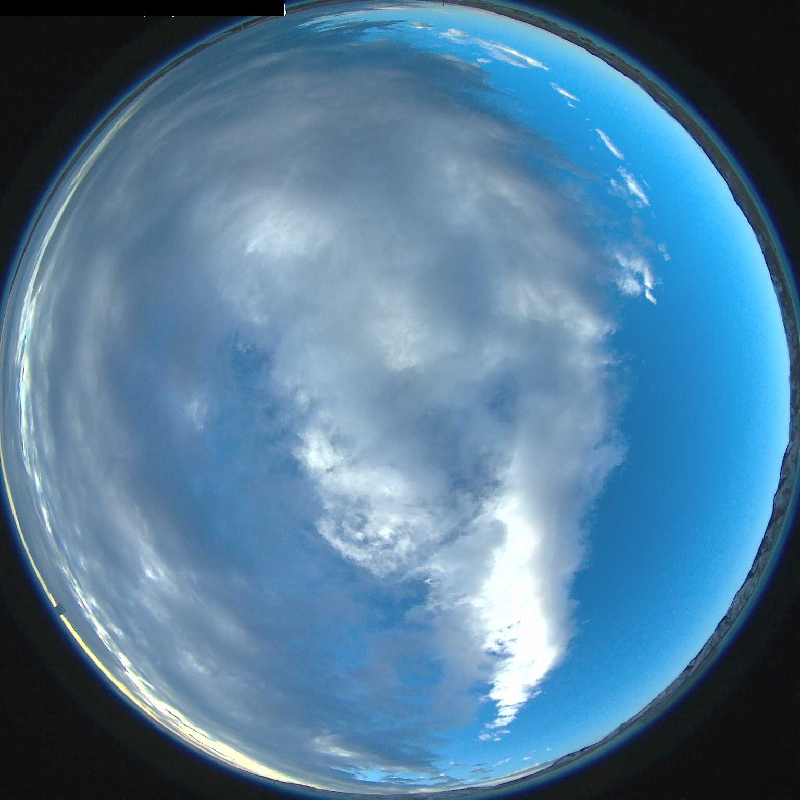

In [ ]:
img = tf.keras.utils.load_img(os.path.join(PWD,'kaggle/input/cloud-images-19510/0101/0101075000.jpg'), target_size = (800,800))
img

In [ ]:
def undistort(img_path, zoom_out_factor, balance, f, dist):
    dim = 2048
    DIM=(dim, dim)
    img = cv2.imread(img_path)

    K=np.array([
        [f, 0.0, 1536/2],
        [0.0, f, 1536/2],
        [0.0, 0.0, 1.0]])
    D=np.array([[dist],[dist],[dist],[dist]])


    dim1 = img.shape[:2][::-1]  #dim1 is the dimension of input image to un-distort
    new_K = np.array([
        [f / zoom_out_factor, 0.0, 1536/2],
        [0.0, f /zoom_out_factor, 1536/2],
        [0.0, 0.0, 1.0]])
    map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), new_K, dim1, cv2.CV_16SC2)
    undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_AREA, borderMode=cv2.BORDER_CONSTANT)
    undistorted_img = cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB)
    return undistorted_img

In [ ]:
def undistort_func(img_path, zoom_out_factor, balance, f, dist):
    dim = 2048
    DIM=(dim, dim)
    img = cv2.imread(img_path)

    K=np.array([
        [f, 0.0, 1536/2],
        [0.0, f, 1536/2],
        [0.0, 0.0, 1.0]])
    D=np.array([[dist],[dist],[dist],[dist]])


    dim1 = img.shape[:2][::-1]  #dim1 is the dimension of input image to un-distort
    new_K = np.array([
        [f / zoom_out_factor, 0.0, 1536/2],
        [0.0, f /zoom_out_factor, 1536/2],
        [0.0, 0.0, 1.0]])
    map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), new_K, dim1, cv2.CV_16SC2)
    undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_AREA, borderMode=cv2.BORDER_CONSTANT)
    undistorted_img = cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB)
    undistorted_img = cv2.resize(undistorted_img, (1000,1000))
    plt.figure(figsize=(5,5))
    plt.axis('off')
    plt.imshow(undistorted_img)

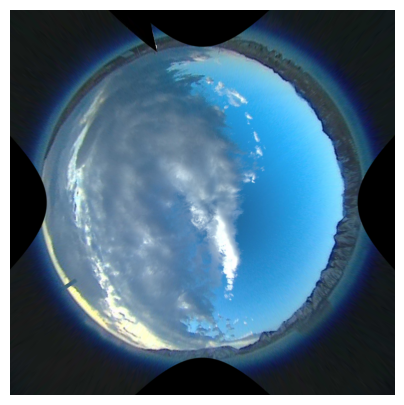

In [ ]:
undistort_func(os.path.join(PWD,'kaggle/input/cloud-images-19510/0101/0101075000.jpg'),5,1,250,0.025)

In [ ]:

import IPython
from IPython.display import display
from ipywidgets import interact, IntSlider, fixed, FloatSlider, IntRangeSlider

img = cv2.imread(os.path.join(PWD,'kaggle/input/cloud-images-19510/0101/0101075000.jpg'))

@interact(
    img=fixed(value = img),
    dist = FloatSlider(description = 'Dist'.ljust(15) + ':',  min = 0.,max = 1.,step = 0.001, readout_format = '0.3f'),
    f = (1,1000,1),
    zoom_out_factor = (1,200,1),
    balance = (0.,1.,0.1)
)
def undistorted_wrap(img,dist = 0.025, f = 400 ,zoom_out_factor = 2, balance=1.0,*args, **kwargs):
    dim = 2048
    DIM=(dim, dim)
#     img = cv2.imread(img_path)

    K=np.array([
        [f, 0.0, 1536/2],
        [0.0, f, 1536/2],
        [0.0, 0.0, 1.0]])
    D=np.array([[dist],[dist],[dist],[dist]])

    dim1 = img.shape[:2][::-1]  #dim1 is the dimension of input image to un-distort
    new_K = np.array([
        [f / zoom_out_factor, 0.0, 1536/2],
        [0.0, f /zoom_out_factor, 1536/2],
        [0.0, 0.0, 1.0]])
    map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), new_K, dim1, cv2.CV_16SC2)
    undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_AREA, borderMode=cv2.BORDER_CONSTANT)
    undistorted_img = cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB)
    undistorted_img = cv2.resize(undistorted_img, (1000,1000))
    plt.figure(figsize=(5,5))
    plt.axis('off')
    plt.imshow(undistorted_img)


interactive(children=(FloatSlider(value=0.0, description='Dist           :', max=1.0, readout_format='0.3f', s…

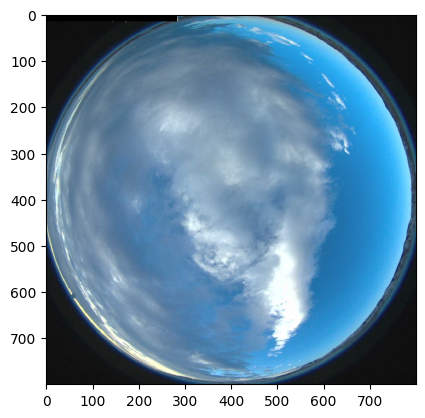

In [ ]:
plt.imshow(img)

In [ ]:

# img = cv2.imread(os.path.join(PWD,'/kaggle/input/cloud-images-19510/0101/0101100000.jpg'))
image = cv2.imread(os.path.join(PWD,'kaggle/input/cloud-images-19510/0101/0101080000.jpg'))

import IPython
from IPython.display import display
from ipywidgets import interact, IntSlider, fixed, FloatSlider, IntRangeSlider, interactive,interactive_output, HBox, VBox, Box, Layout

def undistorted_wrap_with_coeffs(img, f = 400 ,zoom_out_factor = 2, balance=1.0, k1 = 0.025, k2 = 0.025, k3 =0.025, k4 = 0.025, figsize = 1):
    dim = 2048
    DIM=(dim, dim)
#     img = cv2.imread(img_path)
    K=np.array([
        [f, 0.0, 1536/2],
        [0.0, f, 1536/2],
        [0.0, 0.0, 1.0]])
    D=np.array([[k1],[k2],[k3],[k4]])

    dim1 = img.shape[:2][::-1]  #dim1 is the dimension of input image to un-distort
    new_K = np.array([
        [f / zoom_out_factor, 0.0, 1536/2],
        [0.0, f /zoom_out_factor, 1536/2],
        [0.0, 0.0, 1.0]])
    map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), new_K, dim1, cv2.CV_16SC2)
    undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_AREA, borderMode=cv2.BORDER_CONSTANT)
    undistorted_img = cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB)
    undistorted_img = cv2.resize(undistorted_img, (1000,1000))
    plt.figure(figsize=(figsize,figsize))
    plt.axis('off')
    plt.imshow(undistorted_img)


img                       = fixed(description = 'img'.ljust(15) + ':', value =  image)
f                         = IntSlider(description = 'f'.ljust(15) + ':',  min = 1,max = 1000, step = 1, value = 250)
zoom_out_factor           = IntSlider(description = 'zoom_out_factor'.ljust(15) + ':',  min = 1,max = 200,step = 1, value = 16)
balance                   = FloatSlider(description = 'balance'.ljust(15) + ':',  min = 0.,max = 1.,step = 0.1,value = 1)
k1                        = FloatSlider(description = 'k1'.ljust(15) + ':',  min = 0.,max = 1.,step = 0.001, value = 0.025, readout_format = '0.3f')
k2                        = FloatSlider(description = 'k2'.ljust(15) + ':',  min = 0.,max = 1.,step = 0.001, value = 0.025,readout_format = '0.3f')
k3                        = FloatSlider(description = 'k3'.ljust(15) + ':',  min = 0.,max = 1.,step = 0.001, value = 0.025,readout_format = '0.3f')
k4                        = FloatSlider(description = 'k4'.ljust(15) + ':',  min = 0.,max = 1.,step = 0.001, value = 0.025,readout_format = '0.3f')
figsize                   = IntSlider(description = 'figsize'.ljust(15) + ':',  min = 3, max = 15, step = 1, value = 9)


args = {
    'img' : img ,
    'f'  : f ,
    'zoom_out_factor'  : zoom_out_factor ,
    'balance'  : balance ,
    'k1'  : k1 ,
    'k2'  : k2 ,
    'k3'  : k3 ,
    'k4'  : k4 ,
    'figsize' : figsize ,
}

distort_widget = interactive_output(
    undistorted_wrap_with_coeffs,
    args
)



In [ ]:
sliders = list(args.values())

In [ ]:
HBox([VBox(children = sliders[1:]), distort_widget], layout = Layout(flex = 'flex-row'))

# Data Preprocessing

## Creating Tensorflow Datsets

In [ ]:
base_path = '/kaggle/input/cloud-images-19510'

In [ ]:
image_paths = [sorted([os.path.join(root,file) for file in files if file.endswith('.jpg')]) for root,dirs,files in os.walk(base_path) if len(dirs) == 0]

In [ ]:
flattened_image_paths = sorted([os.path.join(root,file) for root,dirs,files in os.walk(base_path) for file in files if not file.endswith('.csv')])

In [ ]:
len(flattened_image_paths)

23515

In [ ]:
def undistort_from_array(img, dim2 = None, dim3 = None, balance = 0):
    dim1 = img.shape[:2][::-1]  #dim1 is the dimension of input image to un-distort
    assert dim1[0]/dim1[1] == DIM[0]/DIM[1], "Image to undistort needs to have same aspect ratio as the ones used in calibration"
    if not dim2:
        dim2 = dim1
    if not dim3:
        dim3 = dim1
    scaled_K = K * dim1[0] / DIM[0]  # The values of K is to scale with image dimension.
    scaled_K[2][2] = 1.0  # Except that K[2][2] is always 1.0
    # This is how scaled_K, dim2 and balance are used to determine the final K used to un-distort image. OpenCV document failed to make this clear!
    new_K = cv2.fisheye.estimateNewCameraMatrixForUndistortRectify(scaled_K, D, dim2, np.eye(3), balance=balance)
    map1, map2 = cv2.fisheye.initUndistortRectifyMap(scaled_K, D, np.eye(3), new_K, dim3, cv2.CV_16SC2)
    undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
    undistorted_img = cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB)
    undistorted_img = cv2.resize(undistorted_img, (1000,1000))
    return undistorted_img


In [ ]:
import tensorflow as tf

class Preprocessor:
    def __init__(
            self,
            filepaths : list[str]
    ):
        self.filepaths = filepaths
        self.dataset = None

    def get_dataset_iterator(self,func):
        if self.dataset:
            return self.dataset
        self.dataset = tf.data.Dataset.from_tensor_slices(self.filepaths)
        self.dataset = self.dataset.map(func, num_parallel_calls=tf.data.AUTOTUNE)
        # self.dataset = self.dataset.cache()
        # self.dataset = self.dataset.shuffle(buffer_size=1000)
        # self.dataset = self.dataset.batch(32)
        # self.dataset = self.dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
        return self.dataset
@tf.function
def load_preprocess_y(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=1)
    image = tf.image.resize(image, [128, 256], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    return image

@tf.function
def get_image_from_path(file_path):
    return image

@tf.py_function(Tout=tf.float64)
def get_undistorted_img(file_path):
    path_str = file_path.numpy().decode('utf-8')
    image = undistort(path_str,zoom_out_factor = 11,f = 282, dist = 0.015,balance = 1)
    return tf.convert_to_tensor(image,dtype = tf.float64)

In [ ]:
train_ds_x = Preprocessor(flattened_image_paths).get_dataset_iterator(get_undistorted_img)
# train_ds_x.map(get_undistorted_img)

In [ ]:
image_iter = train_ds_x.as_numpy_iterator()

In [ ]:
def show_grid_samples(ncols = 3,nrows = 3,scale = 1,**kwargs):
    figsize = (ncols * scale, nrows * scale)
    plt.tight_layout()
    fig,ax = plt.subplots(ncols = ncols, nrows = nrows, figsize = figsize)
    axes = ax.flatten()
    for a in axes:
        a.imshow(image_iter.next()/255, interpolation = 'nearest')
        a.axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.show()

<Figure size 640x480 with 0 Axes>

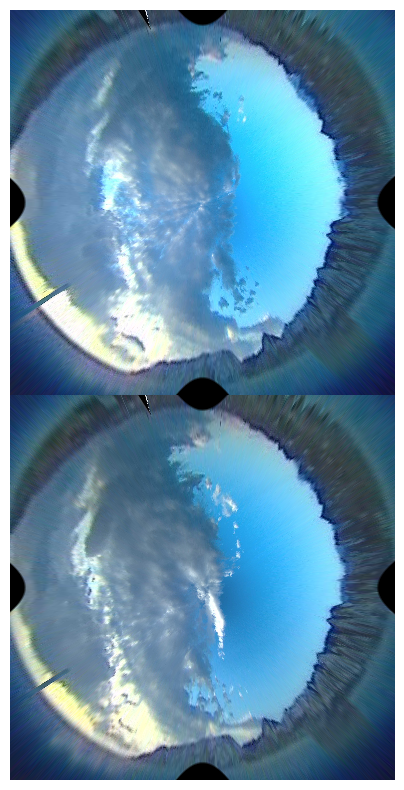

In [ ]:
show_grid_samples(ncols = 1,nrows = 2,scale = 5)

# Tabular Data

In [3]:
PWD =  os.getcwd()
print(PWD)

/


# Sequence Modelling

In [16]:
df = pd.read_csv('/kaggle/input/cloud-images-19510/train_shell_remake_imputed.csv')

In [17]:
train = df.dropna()

In [18]:
# train = df[df['Total Cloud Cover [%]'] > 0]

In [19]:
from sklearn.preprocessing import OrdinalEncoder
time_encoder = OrdinalEncoder().fit(train[['MST']].to_numpy())
train.loc[:,'MST'] = time_encoder.transform(train[['MST']].to_numpy()).reshape(-1)


In [20]:
time_dict = dict(zip(time_encoder.categories_[0],range(0,1440)))

In [21]:
time_dict['00:00']

0

In [24]:
scalerx = StandardScaler()
scalery = StandardScaler()


In [25]:
# scalerx = joblib.load('/kaggle/input/ccd-ai/keras/LSTM-series-B/5/scalerx.joblib')
# scalery = joblib.load('/kaggle/input/ccd-ai/keras/LSTM-series-B/5/scalery.joblib')

In [26]:
train.columns

Index(['DATE (MM/DD)', 'MST', 'Global CMP22 (vent/cor) [W/m^2]',
       'Direct sNIP [W/m^2]', 'Azimuth Angle [degrees]',
       'Tower Dry Bulb Temp [deg C]', 'Tower Wet Bulb Temp [deg C]',
       'Tower Dew Point Temp [deg C]', 'Tower RH [%]', 'Total Cloud Cover [%]',
       'Peak Wind Speed @ 6ft [m/s]', 'Avg Wind Direction @ 6ft [deg from N]',
       'Station Pressure [mBar]', 'Precipitation (Accumulated) [mm]',
       'Snow Depth [cm]', 'Moisture', 'Albedo (CMP11)'],
      dtype='object')

In [27]:
days = train.iloc[:,1].unique()

In [28]:
train_x_df = train[
    ['MST', 'Global CMP22 (vent/cor) [W/m^2]',
       'Direct sNIP [W/m^2]', 'Azimuth Angle [degrees]',
       'Tower Dry Bulb Temp [deg C]', 'Tower Wet Bulb Temp [deg C]',
       'Tower Dew Point Temp [deg C]', 'Tower RH [%]',
       'Peak Wind Speed @ 6ft [m/s]', 'Avg Wind Direction @ 6ft [deg from N]',
       'Station Pressure [mBar]', 'Precipitation (Accumulated) [mm]',
       'Snow Depth [cm]', 'Moisture', 'Albedo (CMP11)']
].astype(np.float64)
train_x_df.loc[:,:] = scalerx.fit_transform(train_x_df)

train_y_df = train[['Total Cloud Cover [%]']].astype(np.float64)

train_y_df.loc[:,:] = scalery.fit_transform(train_y_df)

train_x_df.loc[:,['Total Cloud Cover [%]']] = train_y_df.loc[:,['Total Cloud Cover [%]']]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total Cloud Cover [%]', ylabel='Count'>

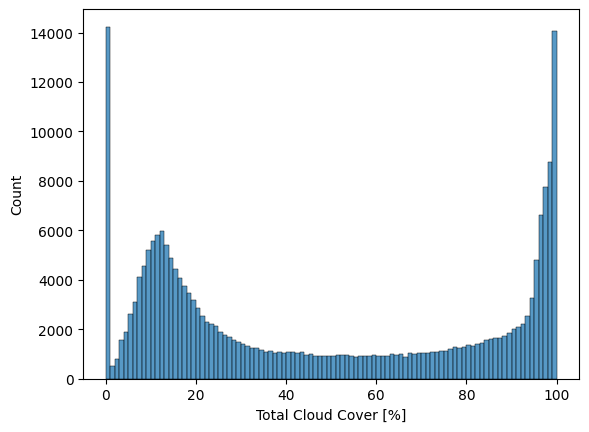

In [29]:
sns.histplot(train[(train['MST'] > 400) & (train['MST'] < 1080)]['Total Cloud Cover [%]'], bins = 100)

## Finding linear relation of cloud cover with other features

In [63]:
def make_plots(
    df : pd.DataFrame,
    target_feature : str,
    feature_pool : list[str],
    nrows, ncols, scale
):
    fig,ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (scale*ncols ,scale*nrows))
    ax = ax.flatten()
    max_len = min(ax.shape[0], len(feature_pool))
    for i in range(max_len):
        axes = ax[i]
        y,x = df[[target_feature,feature_pool[i]]].to_numpy().T
        axes.scatter(x,y, marker = '.')
        axes.set_ylabel(target_feature)
        axes.set_xlabel(feature_pool[i])
        axes.set_title(f'{target_feature} vs \n {feature_pool[i]}')
        
    fig.show()

In [68]:
feature_pool = ['MST', 'Global CMP22 (vent/cor) [W/m^2]',
       'Direct sNIP [W/m^2]', 'Azimuth Angle [degrees]',
       'Tower Dry Bulb Temp [deg C]', 'Tower Wet Bulb Temp [deg C]',
       'Tower Dew Point Temp [deg C]', 'Tower RH [%]',
       'Peak Wind Speed @ 6ft [m/s]', 'Avg Wind Direction @ 6ft [deg from N]',
       'Station Pressure [mBar]', 'Precipitation (Accumulated) [mm]',
       'Snow Depth [cm]', 'Moisture', 'Albedo (CMP11)']
print(len(feature_pool))

15


In [75]:
required_df = train[(train['Total Cloud Cover [%]'] > 0) & (train['DATE (MM/DD)'] == '01/03')].reset_index()

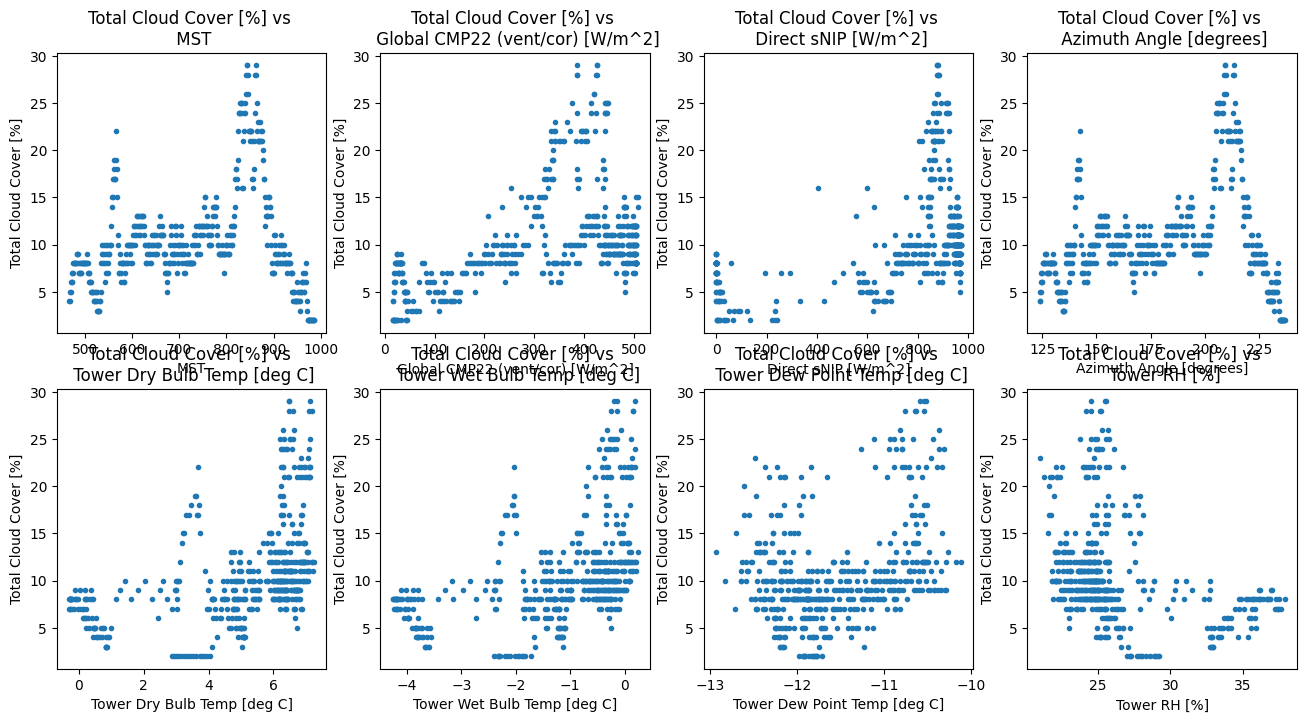

In [73]:
make_plots(
    required_df,
    target_feature = 'Total Cloud Cover [%]',
    feature_pool = feature_pool[0:8],
    nrows = 2,
    ncols = 4,
    scale = 4
)

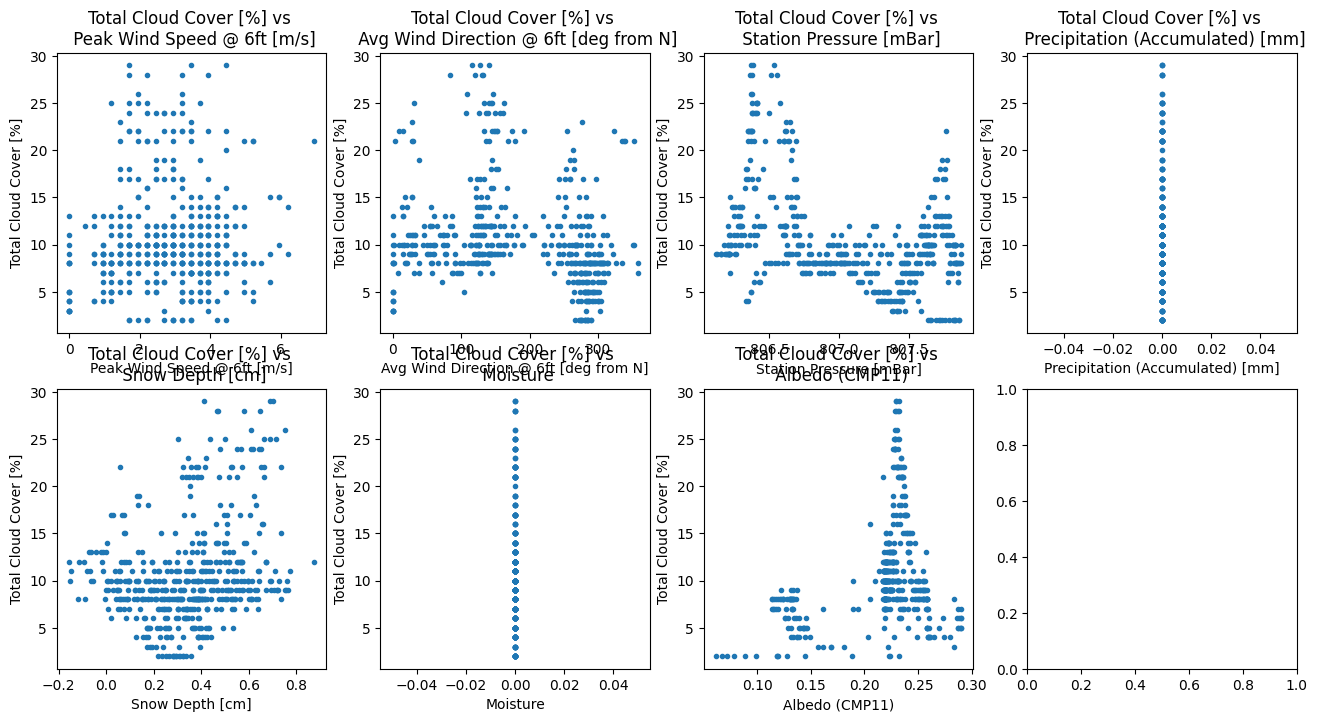

In [74]:
make_plots(
    required_df,
    target_feature = 'Total Cloud Cover [%]',
    feature_pool = feature_pool[8:],
    nrows = 2,
    ncols = 4,
    scale = 4
)

### Creating tensorflow datasets

In [14]:
train_len = len(train_x_df)
print(train_len)
day_count = int(train_len / 1440)
print(day_count)
print(335 * 0.05)

482400
335
16.75


17 days for validation rest for training

In [15]:
gap = 2

In [16]:
X = train_x_df[::gap]
y = train_y_df[::gap]

In [17]:
assert len(X) == len(y)

In [18]:
future_buffer = 30 / gap # 30 minutes because sampling every minute
sequence_size = 360 / gap
print(future_buffer, sequence_size)
future_buffer,sequence_size = int(future_buffer),int(sequence_size)

15.0 180.0


In [19]:
one_day_sample_count = 1440 / gap
print(one_day_sample_count)
one_day_sample_count = int(one_day_sample_count)

720.0


In [20]:
def get_dataset_of_sequences(X, window_size = 360, stride = 1, shift = 1):
    dataset = tf.data.Dataset.from_tensor_slices(X)
    dataset = dataset.window(window_size,shift = shift, stride = stride,drop_remainder = True)
    dataset = dataset.flat_map(lambda window : window.batch(window_size))
    return dataset

In [21]:
def apply_dataset_optimizations(dataset,cache = False, batch_size = 32, shuffle = False, shuffle_size = 32):
    if cache:
        dataset = dataset.cache()
    if shuffle:
        dataset = dataset.shuffle(buffer_size=shuffle_size)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

## Sampling from Sliding Window

In [22]:
X_train, X_val, y_train, y_val = train_test_split(
    X.to_numpy(), 
    y.to_numpy(),
    test_size = 17 * one_day_sample_count, 
    shuffle = False
)

In [23]:
# removing last 30 minutes of data
X_train = X_train[-(future_buffer + 1)::-1][::-1]
X_val = X_val[-(future_buffer + 1)::-1][::-1]
print(X_train.shape, X_val.shape)
#(457890, 16) (24450, 16)

(228945, 16) (12225, 16)


In [46]:
print(X_val.shape[0] - 359)

11866


In [47]:
# Removing first 30 + sequence_size minutes of Data
y_train = y_train[future_buffer + sequence_size - 1:]
y_val = y_val[future_buffer + sequence_size - 1:]
print(y_train.shape, y_val.shape)

(228766, 1) (12046, 1)


In [50]:
X_val_dataset = get_dataset_of_sequences(
    X = X_val,
    window_size = sequence_size,
    stride = 1,
    shift = 1
)
y_val_dataset = tf.data.Dataset.from_tensor_slices(y_val)

In [51]:
X_train_dataset = get_dataset_of_sequences(
    X = X_train,
    window_size = sequence_size,
    stride = 1,
    shift = 1
)
y_train_dataset = tf.data.Dataset.from_tensor_slices(y_train)

In [52]:
dataset_train = tf.data.Dataset.zip(X_train_dataset, y_train_dataset)
dataset_train = apply_dataset_optimizations(
    dataset_train,
    batch_size = 32, 
    cache = True
)

In [53]:
dataset_val = tf.data.Dataset.zip(X_val_dataset, y_val_dataset)
dataset_val = apply_dataset_optimizations(
    dataset_val,
    batch_size = 32, 
    cache = True
)

In [76]:
model = tf.keras.models.load_model('/kaggle/input/ccd-ai/keras/LSTM-series-B/5/LSTM_series_B_early_stopped.keras')

In [58]:
model.evaluate(dataset_val, return_dict = True)

377/377 ━━━━━━━━━━━━━━━━━━━━ 105s 276ms/step - accuracy: 0.0000e+00 - loss: 0.0453 - mean_absolute_error: 0.1056 - r2_score: 0.5579


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


{'accuracy': 0.0,
 'loss': 0.03853655606508255,
 'mean_absolute_error': 0.10038185864686966,
 'r2_score': 0.9136776924133301}

## Sampling from within a day with non-zero Cloud Cover or within each day

In [30]:
# For Only non - Zero cloud cover
# non_zero_indices = train['Total Cloud Cover [%]'] > 0
# print(non_zero_indices.sum())
# # for whole day
non_zero_indices = np.full([train.to_numpy().shape[0]], True)
print(non_zero_indices.sum())

482400


In [31]:
train.to_numpy().shape

(482400, 17)

In [32]:
train_x_df = train_x_df[non_zero_indices]
train_y_df = train_y_df[non_zero_indices]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total Cloud Cover [%]', ylabel='Count'>

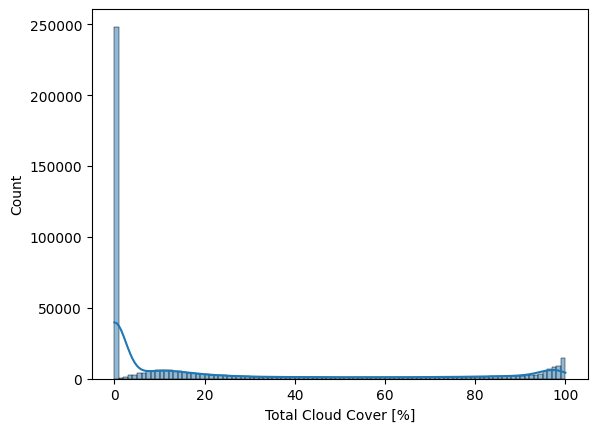

In [33]:
sns.histplot(train[non_zero_indices]['Total Cloud Cover [%]'],bins = 100, kde = True)

In [ ]:
train_y_df[25,15,30]

In [34]:
def get_sequences_of_listed_days(days_list, data_df,train_x_df, train_y_df, window_size = 360, future_buffer = 30):
        X_dataset_list = []
        y_dataset_list = []
        for day in days_list:
            day_x_df = train_x_df.loc[data_df['DATE (MM/DD)'] == day].to_numpy()
            day_y_df = train_y_df.loc[data_df['DATE (MM/DD)'] == day].to_numpy()
            data_len = day_x_df.shape[0]
            assert day_x_df.shape[0] == day_y_df.shape[0]
            day_x_df = day_x_df[0 : data_len - future_buffer]
            day_y_df = day_y_df[window_size + future_buffer - 1:]
            X_dataset_list.append(get_dataset_of_sequences(day_x_df, window_size = window_size))
#             y_dataset_list.append(get_dataset_of_sequences(day_y_df, window_size = future_buffer))
            y_dataset_list.append(tf.data.Dataset.from_tensor_slices(day_y_df))
            
        
        X_dataset = X_dataset_list[0]
        y_dataset = y_dataset_list[0]
        for dataset in X_dataset_list[1:]:
            X_dataset = X_dataset.concatenate(dataset)
        for dataset in y_dataset_list[1:]:
            y_dataset = y_dataset.concatenate(dataset)
        return X_dataset, y_dataset

def get_dataset_of_sequences(X, window_size = 360, stride = 1, shift = 1):
    dataset = tf.data.Dataset.from_tensor_slices(X)
    dataset = dataset.window(window_size,shift = shift, stride = stride,drop_remainder = True)
    dataset = dataset.flat_map(lambda window : window.batch(window_size))
    return dataset

def apply_dataset_optimizations(dataset,cache = False, batch_size = 32, shuffle = False, shuffle_size = 32):
    if cache:
        dataset = dataset.cache()
    if shuffle:
        dataset = dataset.shuffle(buffer_size=shuffle_size)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

In [35]:
gap = 2
future_buffer = 30 / gap # 30 minutes because sampling every minute
sequence_size = 360 / gap
print(future_buffer, sequence_size)
future_buffer,sequence_size = int(future_buffer),int(sequence_size)

15.0 180.0


In [36]:
X = train_x_df[::gap]
y = train_y_df[::gap]

In [37]:
assert len(X) == len(y)

In [38]:
print(len(X))

241200


In [39]:
days_list = train.iloc[:,0].unique()
days_list = sorted(days_list)
print(days_list[0:10])

['01/01', '01/02', '01/03', '01/04', '01/05', '01/06', '01/07', '01/08', '01/09', '01/10']


In [40]:
dataset_val = tf.data.Dataset.zip(
    get_sequences_of_listed_days(
        days_list[-17:], 
        train, 
        X, 
        y, 
        window_size = sequence_size, 
        future_buffer = future_buffer)
)
dataset_train = tf.data.Dataset.zip(
    get_sequences_of_listed_days(
        days_list[-18::-1][::-1], 
        train, 
        X, 
        y,  
        window_size = sequence_size, 
        future_buffer = future_buffer)
)

In [41]:
print(dataset_val.as_numpy_iterator().next()[0].shape, dataset_val.as_numpy_iterator().next()[1].shape)
print(dataset_train.as_numpy_iterator().next()[0].shape, dataset_train.as_numpy_iterator().next()[1].shape)

(180, 16) (1,)
(180, 16) (1,)


In [42]:
dataset_val = apply_dataset_optimizations(
    dataset_val,
    batch_size = 32, 
    cache = True
)
dataset_train = apply_dataset_optimizations(
    dataset_train,
    batch_size = 32, 
    cache = True
)

In [43]:
print(dataset_val.as_numpy_iterator().next()[0].shape, dataset_val.as_numpy_iterator().next()[1].shape)
print(dataset_train.as_numpy_iterator().next()[0].shape, dataset_train.as_numpy_iterator().next()[1].shape)

(32, 180, 16) (32, 1)
(32, 180, 16) (32, 1)


In [44]:
np.concatenate([data[0] for data in dataset_val.as_numpy_iterator()]).shape

(8942, 180, 16)

# Saving Models to Kaggle Database

## Secret and Directory Initialization

In [75]:
dir_to_new_model = '/kaggle/working/models'
import os
import json

from kaggle_secrets import UserSecretsClient
secrets = UserSecretsClient()

os.environ['KAGGLE_USERNAME'] = secrets.get_secret("KAGGLE_USERNAME")
os.environ['KAGGLE_KEY'] = secrets.get_secret("KAGGLE_KEY")

os.makedirs('/kaggle/working/models', exist_ok = True)

## Creating Kaggle Models

In [102]:


model_meta_data = {
  "ownerSlug": "ishansrivastava1308",
  "title": "CloudCover AI",
  "slug": "ccd-ai",
  "subtitle": "",
  "isPrivate": False,
  "description": "# Model Summary\n\n# Model Characteristics\n\n# Data Overview\n\n# Evaluation Results\n",
  "publishTime": "",
  "provenanceSources": ""
}

with open(os.path.join(dir_to_new_model,'model-metadata.json'), 'w') as f:
    json.dump(model_meta_data, f)
    

In [103]:
#  !kaggle models create --path /kaggle/working/models

Your model was created. Id=77046. Url=https://www.kaggle.com/models/ishansrivastava1308/ccd-ai


## Creating Model instance

In [33]:
model_instance_meta_data = {
  "ownerSlug": "ishansrivastava1308",
  "modelSlug": "ccd-ai",
  "instanceSlug": "Seq-to-Seq-Series-A",
  "framework": "keras",
  "overview": "",
  "usage": "# Model Format\n\n# Training Data\n\n# Model Inputs\n\n# Model Outputs\n\n# Model Usage\n\n# Fine-tuning\n\n# Changelog\n",
  "licenseName": "Apache 2.0",
  "fineTunable": True,
  "trainingData": [],
  "modelInstanceType": "Unspecified",
  "baseModelInstanceId": 0,
  "externalBaseModelUrl": ""
}

with open(os.path.join('/kaggle/working/models','model-instance-metadata.json'), 'w') as f:
    json.dump(model_instance_meta_data, f)
    

In [35]:
!kaggle models instances create -p /kaggle/working/models --dir-mode tar

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Starting upload for file Seq_To_Seq_LSTM_Series_A_base.keras
100%|██████████████████████████████████████| 8.35M/8.35M [00:00<00:00, 11.5MB/s]
Upload successful: Seq_To_Seq_LSTM_Series_A_base.keras (8MB)
Your model instance was created. Id=56542. Url=https://www.kaggle.com/models/ishansrivastava1308/ccd-ai/Keras/seq-to-seq-series-a


## Creating model versions

In [36]:
!kaggle models instances versions create ishansrivastava1308/ccd-ai/keras/Seq-to-Seq-Series-A -p /kaggle/working/models --dir-mode tar

Starting upload for file Seq_To_Seq_LSTM_Series_A_base.keras
100%|██████████████████████████████████████| 8.35M/8.35M [00:00<00:00, 11.7MB/s]
Upload successful: Seq_To_Seq_LSTM_Series_A_base.keras (8MB)
Your model instance version was created. Url=https://www.kaggle.com/models/ishansrivastava1308/ccd-ai/Keras/Seq-to-Seq-Series-A/2


# Metrics and Callbacks

## Callbacks

In [52]:
class LossAndErrorPrintingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs:
            print()
            val = {}
            train = defaultdict(lambda: "None")
            for k,v in logs.items():
                if k.startswith('val_'):
                    val[k[4:]] = v
                else:
                    train[k] = [v, "None"]
            # print(val, train)

            for k,v in val.items():
                if train[k] != "None":
                    train[k][1] = v
                else:
                    train[k] = ["None", v]

            print("+","-"*42,"+","-"*42,"+","-"*42,"+",sep = "")
            print("| {:<40} | {:<40} | {:<40} |".format("Metrics","Train","Val"))
            print("+","-"*42,"+","-"*42,"+","-"*42,"+",sep = "")
            for k,v in train.items():
                print("| {:<40} | {:<40} | {:<40} |".format(k, v[0], v[1]))
            print("+","-"*128,"+",sep = "")
            print()



In [53]:
class SaveModelOnEpoch(tf.keras.callbacks.Callback):
    def __init__(self, save_path,freq = 5,offset = 0):
        super(SaveModelOnEpoch, self).__init__()
        self.save_path = save_path
        self.freq = freq
        self.offset = offset

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.freq == 0:  # Save every 5 epochs
            self.model.save(self.save_path.format(epoch=self.offset+epoch+1))
            print(f"Model saved at epoch {self.offset+epoch+1}.")
        
save_callback = SaveModelOnEpoch('/kaggle/working/models/LSTM_series_A_{epoch}.keras',offset = 0, freq = 5)

In [54]:
import tensorflow as tf
from datetime import datetime
model_dir  = '/kaggle/working/models'
log_dir = os.path.join(model_dir,"logs/fit/") + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [55]:
# !cp -r /kaggle/input/ccd-ai/keras/LSTM-series-B/4/logs /kaggle/working/models

In [56]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [57]:
%load_ext tensorboard
%tensorboard --logdir {os.path.join(model_dir,"logs/fit/")}

# LSTM Model


In [70]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((180,16)),
    tf.keras.layers.Conv1D(1024,1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv1D(1024,1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv1D(512,1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv1D(512,1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv1D(256,1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv1D(256,1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv1D(128,1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('linear'),
    
    tf.keras.layers.LSTM(256, return_sequences=True, ),
    tf.keras.layers.LSTM(128, return_sequences=False,),
    
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation = 'linear')
    
])

## Multi-LSTM

In [28]:
n_past = 180
n_future = 15
n_features = 16
n_output_features = 1

In [98]:
inputs = tf.keras.layers.Input(shape=(n_past, n_features))

# Inference Model
x = tf.keras.layers.Conv1D(1024,1)(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv1D(512,1)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv1D(512,1)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv1D(256,1)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv1D(256,1)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv1D(128,1)(x)
x = tf.keras.layers.BatchNormalization()(x)
encoder_inputs = tf.keras.layers.Activation('linear')(x)




encoder_l1 = tf.keras.layers.LSTM(128,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(256, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(128, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(256, return_sequences=True)(decoder_l1,initial_state = encoder_states2)


output_decoder = tf.keras.Sequential([
    tf.keras.layers.Input((256,1)),
    tf.keras.layers.Dense(512),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(256),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(n_output_features)
])


decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)


x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(512))(decoder_l2)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.ReLU())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(256))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.ReLU())(x)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_output_features))(x)
#


model = tf.keras.models.Model(inputs,decoder_outputs2)
#
model.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20      │ (None, 180, 16)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_48 (LSTM)      │ [(None, 180,      │     74,240 │ input_layer_20[0… │
│                     │ 128), (None,      │            │                   │
│                     │ 128), (None,      │            │                   │
│                     │ 128)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_49 (LSTM)      │ [(None, 256),     │    394,240 │ lstm_48[0][0]     │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_12    │ (None, 15, 256)   │          0 │ lstm_49[0][0]     │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_50 (LSTM)      │ (None, 15, 128)   │    197,120 │ repeat_vector_12… │
│                     │                   │            │ lstm_48[0][1],    │
│                     │                   │            │ lstm_48[0][2]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_51 (LSTM)      │ (None, 15, 256)   │    394,240 │ lstm_50[0][0],    │
│                     │                   │            │ lstm_49[0][1],    │
│                     │                   │            │ lstm_49[0][2]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_30 │ (None, 15, 512)   │    131,584 │ lstm_51[0][0]     │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_31 │ (None, 15, 512)   │      2,048 │ time_distributed… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_32 │ (None, 15, 512)   │          0 │ time_distributed… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_33 │ (None, 15, 256)   │    131,328 │ time_distributed… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_34 │ (None, 15, 256)   │      1,024 │ time_distributed… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_35 │ (None, 15, 256)   │          0 │ time_distributed… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_36 │ (None, 15, 1)     │        257 │ time_distributed… │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,326,081 (5.06 MB)

 Trainable params: 1,324,545 (5.05 MB)

 Non-trainable params: 1,536 (6.00 KB)

## Seq to Seq with Attention

In [47]:
n_past = 180
n_future = 15
n_features = 16
n_output_features = 1
inputs = tf.keras.layers.Input(shape=(n_past, n_features))

def attention_layer(inputs):
    inp = tf.keras.layers.Dense(32)(inputs)
    attention = tf.keras.layers.MultiHeadAttention(num_heads=8, key_dim=64)(inp, inp, inp)
    attention = tf.keras.layers.Dense(32)(attention)
    x = tf.keras.layers.Add()([inp, attention])
    norm_add = tf.keras.layers.LayerNormalization()(x)

    x = tf.keras.layers.Dense(256)(norm_add)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dense(256)(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dense(32)(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Add()([norm_add, x])
    x = tf.keras.layers.LayerNormalization()(x)
    return x

def make_model():
    inference_model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(128,1),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv1D(64,1),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv1D(32,1),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('linear'),
    ], name = 'Inference_model')

    encoder_inputs = inference_model(inputs)
    encoder_l1 = tf.keras.layers.LSTM(128,return_sequences = True, return_state=True)
    enc_seq1, enc_h1, enc_c1 = encoder_l1(encoder_inputs)

    # attention = tf.keras.layers.MultiHeadAttention(num_heads=8, key_dim=64)
    # attention_output = attentioreturn_staten(*[enc_seq1, enc_seq1, enc_seq1])
    # We get a attention score for each of the layers


    attention = attention_layer(enc_seq1)
    attention = attention_layer(attention)
    context_vector = attention_layer(attention)


    decoder_hidden_states = [enc_h1, enc_c1]

    outputs = []
    for i in range(n_future):
        hidden_rep = tf.keras.layers.RepeatVector(180)(decoder_hidden_states[0])
        context_rep = tf.keras.layers.RepeatVector(180)(decoder_hidden_states[0])
        concatenation = tf.keras.layers.Concatenate(axis = -1)([context_vector, hidden_rep, context_rep])
        self_attention = tf.keras.layers.Conv1D(128,1)(concatenation)
        self_attention = tf.keras.layers.BatchNormalization()(self_attention)
        self_attention = tf.keras.layers.Activation('relu')(self_attention)
        self_attention = tf.keras.layers.Conv1D(64,1)(self_attention)
        self_attention = tf.keras.layers.BatchNormalization()(self_attention)
        self_attention = tf.keras.layers.Activation('relu')(self_attention)
        self_attention = tf.keras.layers.Conv1D(32,1)(self_attention)
        self_attention = tf.keras.layers.BatchNormalization()(self_attention)
        self_attention = tf.keras.layers.Activation('relu')(self_attention)
        self_attention = tf.keras.layers.Conv1D(1,1)(self_attention)
        self_attention = tf.keras.layers.BatchNormalization()(self_attention)
        self_attention = tf.keras.layers.Activation('tanh')(self_attention)
        self_attention = tf.keras.layers.Flatten()(self_attention)
        cell_outputs, decoder_hidden_states = tf.keras.layers.LSTMCell(128)(self_attention, [enc_h1, enc_c1])
        # Decoding
        x = tf.keras.layers.Dense(256)(cell_outputs)
        x = tf.keras.layers.ReLU()(x)
        x = tf.keras.layers.Dense(1)(x)
        outputs.append(x)

    concatenate_outputs = tf.keras.layers.Concatenate(axis = -1)(outputs)
    model = tf.keras.Model(inputs, concatenate_outputs)
    return model

model = make_model()
model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 180, 16)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Inference_model     │ (None, 180, 32)   │     13,408 │ input_layer_4[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ [(None, 180,      │     82,432 │ Inference_model[… │
│                     │ 128), (None,      │            │                   │
│                     │ 128), (None,      │            │                   │
│                     │ 128)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 180, 32)   │      4,128 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 180, 32)   │     67,104 │ dense[0][0],      │
│ (MultiHeadAttentio… │                   │            │ dense[0][0],      │
│                     │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 180, 32)   │      1,056 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 180, 32)   │          0 │ dense[0][0],      │
│                     │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 180, 32)   │         64 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 180, 256)  │      8,448 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 180, 256)  │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 180, 256)  │          0 │ re_lu[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 180, 256)  │     65,792 │ re_lu_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 180, 256)  │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 180, 32)   │      8,224 │ re_lu_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 180, 32)   │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 180, 32)   │          0 │ layer_normalizat… │
│                     │                   │            │ re_lu_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 180, 32)   │         64 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 180, 32)   │      1,056 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 180, 32)   │     67,104 │ dense_5[0][0],    │
│ (MultiHeadAttentio… │                   │            │ dense_5[0][0],  

 Total params: 4,150,586 (15.83 MB)

 Trainable params: 4,143,388 (15.81 MB)

 Non-trainable params: 7,198 (28.12 KB)

# Model Training

In [66]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 180, 16)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ [(None, 180,      │     74,240 │ input_layer_1[0]… │
│                     │ 128), (None,      │            │                   │
│                     │ 128), (None,      │            │                   │
│                     │ 128)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ [(None, 256),     │    394,240 │ lstm_4[0][0]      │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_1     │ (None, 15, 256)   │          0 │ lstm_5[0][0]      │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ (None, 15, 128)   │    197,120 │ repeat_vector_1[… │
│                     │                   │            │ lstm_4[0][1],     │
│                     │                   │            │ lstm_4[0][2]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ (None, 15, 256)   │    394,240 │ lstm_6[0][0],     │
│                     │                   │            │ lstm_5[0][1],     │
│                     │                   │            │ lstm_5[0][2]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_1  │ (None, 15, 1)     │        257 │ lstm_7[0][0]      │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,060,097 (4.04 MB)

 Trainable params: 1,060,097 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
X_train = dataset_train.as_numpy_iterator().next()[0]

In [50]:
X_train.shape

(32, 180, 16)

In [51]:
model.predict(X_train[0:]).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


(32, 15)

In [58]:
model.compile(optimizer='adam',
loss=tf.keras.losses.MeanSquaredError(reduction = 'sum'),
metrics=[
#     tf.keras.metrics.R2Score(), 
    tf.keras.metrics.MeanAbsoluteError(),
    tf.keras.metrics.MeanAbsolutePercentageError(),
    tf.keras.metrics.RootMeanSquaredError(),
])


In [61]:
history = model.fit(
    x = dataset_train.take(200),
    validation_data = dataset_val,
    initial_epoch = 0,
    epochs = 100,
    callbacks = [LossAndErrorPrintingCallback(), early_stopping, save_callback, tensorboard_callback],
)

Epoch 1/100
    200/Unknown 31s 146ms/step - loss: 11.7666 - mean_absolute_error: 0.3923 - mean_absolute_percentage_error: 96.6048 - root_mean_squared_error: 0.5908
+------------------------------------------+------------------------------------------+------------------------------------------+
| Metrics                                  | Train                                    | Val                                      |
+------------------------------------------+------------------------------------------+------------------------------------------+
| loss                                     | 8.412575721740723                        | 15.898584365844727                       |
| mean_absolute_error                      | 0.32208847999572754                      | 0.43813619017601013                      |
| mean_absolute_percentage_error           | 82.58460235595703                        | 94.96871185302734                        |
| root_mean_squared_error                  | 0.51

In [34]:
model.save('/kaggle/working/models/Seq_to_Seq_Attention.keras')

In [40]:
!kaggle models instances versions create ishansrivastava1308/ccd-ai/keras/LSTM-series-B -p /kaggle/working/models --dir-mode tar

Starting upload for file LSTM_series_B_early_stopped.keras
100%|██████████████████████████████████████| 16.2M/16.2M [00:00<00:00, 20.5MB/s]
Upload successful: LSTM_series_B_early_stopped.keras (16MB)
Starting upload for file LSTM_series_A_5.keras
100%|██████████████████████████████████████| 16.2M/16.2M [00:00<00:00, 21.0MB/s]
Upload successful: LSTM_series_A_5.keras (16MB)
Starting upload for file logs.tar
100%|██████████████████████████████████████| 1.04M/1.04M [00:00<00:00, 1.82MB/s]
Upload successful: logs.tar (1MB)
Starting upload for file LSTM_series_A_10.keras
100%|██████████████████████████████████████| 16.2M/16.2M [00:00<00:00, 22.1MB/s]
Upload successful: LSTM_series_A_10.keras (16MB)
Starting upload for file LSTM_series_A_15.keras
100%|██████████████████████████████████████| 16.2M/16.2M [00:00<00:00, 21.1MB/s]
Upload successful: LSTM_series_A_15.keras (16MB)
Your model instance version was created. Url=https://www.kaggle.com/models/ishansrivastava1308/ccd-ai/Keras/LSTM-series

In [21]:
model = tf.keras.models.load_model('/kaggle/input/ccd-ai/keras/LSTM-series-B/4/LSTM_series_B_early_stopped.keras', compile = False)

In [22]:
pd.DataFrame(scalery.inverse_transform(y_train[0].reshape(-1,1)), columns = train_y_df.columns)

,Total Cloud Cover [%]
0,-3.552714e-15


In [23]:
pd.DataFrame(scalerx.inverse_transform(X_train[0]), columns = train_x_df.columns)

ValueError: operands could not be broadcast together with shapes (180,16) (15,) (180,16) 

In [339]:
predictions = model.predict(np.concatenate([data[0] for data in dataset_val.as_numpy_iterator()]))

177/177 ━━━━━━━━━━━━━━━━━━━━ 47s 265ms/step


In [394]:
y_historical = scalery.inverse_transform(x_val[:,:,-1])

In [465]:
batch1x,batch1y = dataset_val.as_numpy_iterator().next()
batch1x = batch1x[10:10+15]
batch1y = batch1y[10:10+15]

In [466]:
pred = model.predict(batch1x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


In [467]:
batch1x[0:,:,-1].reshape(-1).shape

(2700,)

In [472]:
batch1x[0,:,-1].reshape(-1,1).shape

(180, 1)

In [473]:
pred_df.loc[:180,["Historical"]]

181

In [477]:
# fig,ax = plt.subplots(figsize = (15,5))
# ax.plot(np.concatenate([batch1x[2,:,-1]]))

def plot_forecast(x,y,idx):
    batch1x = x[idx:idx+15]
    batch1y = y[idx:idx+15]
    pred = model.predict(batch1x)

    pred_df = pd.DataFrame(np.full((195,3),np.nan), columns = ["Historical","Preds","Actual"])

    pred_df.loc[180:,["Preds","Actual"]] = np.column_stack([scalery.inverse_transform(pred[:]),scalery.inverse_transform(batch1y[:])])
    pred_df.loc[:179,["Historical"]] = scalery.inverse_transform(batch1x[0,:,-1].reshape(-1,1)),

    pred_df.plot(figsize = (16,5))

# plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


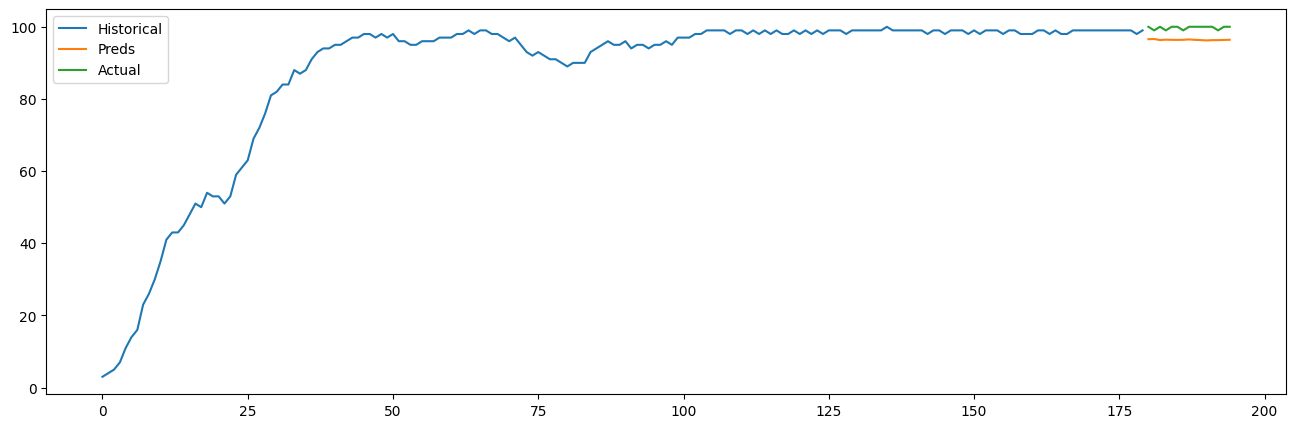

In [485]:
plot_forecast(x_val, y_true, 5000)

In [439]:
pred_df

,True
0,-0.537715
1,-0.595222
2,-0.595222
3,-0.623975
4,-0.652729
...,...
205,-0.480207
206,-0.537715
207,-0.537715
208,-0.537715


In [381]:
pd.DataFrame(np.column_stack([scalery.inverse_transform(predictions), scalery.inverse_transform(y_true)], y_historical[0]), columns = ['Preds', 'True'])[:].plot(figsize = (15,5))

ValueError: Shape of passed values is (5648, 3), indices imply (5648, 2)

# Plotting and testing

In [ ]:
scalery.inverse_transform(train_y_df[480:480 + 195])

In [48]:
np.expand_dims(train_x_df.loc[480:480+100,:].to_numpy(), axis = 0).shape

(1, 101, 16)

In [54]:
scalery.inverse_transform(model.predict(np.expand_dims(train_x_df.loc[480:480+160,:].to_numpy(), axis = 0)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[24.478645]], dtype=float32)

In [ ]:
scalery.inverse_transform(model.predict(X_train[0]))

In [96]:
predictions = model.predict(dataset_val)

280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [97]:
y_val = np.concatenate([data[1] for data in dataset_val])

<Axes: >

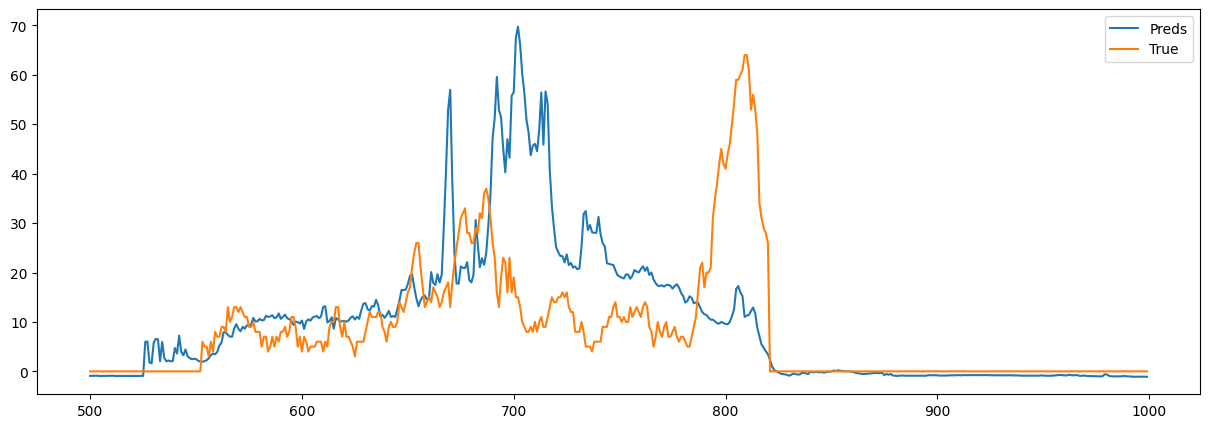

In [99]:
pd.DataFrame(np.column_stack([scalery.inverse_transform(predictions), scalery.inverse_transform(y_val)]), columns = ['Preds', 'True'])[500:1000].plot(figsize = (15,5))